# Assignment 1B

Wayne Nixalo

2018/2/21

[link](http://underactuated.csail.mit.edu/Spring2018/index.html#textbook/assignments/videos)

## 1. Definition of Underactuated
---

The following problem explores the definition of underactuated as described in the lecture notes. You should
not need to derived detailed equations of motion for any of the problems in this section.

### 1.1 Simple Helicopter

**[2 pts]** A helicopter with two rotors is constrained to move in a vertical plane. Assume gravity acting on the helicopter. The task is to control the position $(x, z)$ and pitch $(θ)$ by varying the thrust produced by the two rotors. **Explain whether this system is fully-actuated (in all states), or if there are any states in which this problem is underactuated**. Use the definition of underactuated provided in lecture.

>Underactuated when θ $≠$ 0 or π , ie when the helicopter is tilted at any angle other than straight up or down. The action of righting itself *will* result in a translation along the $x$ or $z$ axis, since both rotors are oriented in the same direction.

>Now how to express as an equation... what *are* the eqns of motion for this?

>Well what if I said the configuration vector **q** consisted of 3 diagonal elements: X, Z, and Θ.. then the F2 vector function would basically be gravity.. and the control vector **u** would be just the rotors starting in the Z direction.. yeah?

 "You should
not need to derived detailed equations of motion for any of the problems in this section."

>Huh.. okay. Back to the lecture notes again then.

In [2]:
import numpy as np

In [7]:
M = np.eye(3)
# M[0][0] *= 3
# M[1][1] *= 5
print(np.linalg.matrix_rank(M))
print(M)

3
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


>Okay.. so I guess one row would be X, another Z, and another Θ..

>Aaand.. my control inputs point along the same direction (can be +/-)..

> basically, you know the definition for an underactuated system. The rank of the controllable state vector is less than the dimension of the configuration vector. ie: `rank(f2(q,q_dot,t)) < dim(q)`

**[3 pts] If you said ”Underactuated” above, then please provide an expression for an acceleration that cannot be instantaneously achieved by the system.** Assume that $F_1$ and $F_2$ are unbounded (and can be negative) and that the current state of the system is $x = 5$, $z = 1$, $θ = 0.5$ radians. (Your answer should consist of three numerical values: $\ddot{x}$, $\ddot{y}$, and $\ddot{θ}$.)

>One example is:

$$\ddot{x} > 0$$
$$\ddot{y} > 0$$
$$\ddot{z} > 0$$

>There are 12 possible initial acceleration states, only 9 of which are attainable with this control setup given this initial condition.

>They are: 

In [16]:
qdd1 = np.array([1,1,1]); qdd2 = np.array([0,0,0]); qdd3 = np.array([1,0,0])
for q in [qdd1,qdd2,qdd3]:print("q = ", q)

('q = ', array([1, 1, 1]))
('q = ', array([0, 0, 0]))
('q = ', array([1, 0, 0]))


<img src="images/asn1b_scratch.png">

### 1.2 Bicycle

1\. **[2 pts]** For the purposes of this problem, assume that the driver has control over the steering angle
$φ$ and has rear wheel drive. Treat the drive torque as a simple ground reaction force $u_r$ acting at the
tire and let $u_f = 0$. **Is this system is fully-actuated or underactuated? Explain.**

>It's Underactuated because with only rear-wheel drive the bike cannot turn in place ie: have a $\ddot{y} ≠ 0$ while $\ddot{x}=0$, if we take the bike to be parllel to $x$ and perpendicular to $y$.

2\. **[2 pts]** Now, suppose the the driver has control of both the front and rear longitudinal tire forces ur
and $u_f$ and so has 3 total control inputs. **Is this system is fully-actuated or underactuated?
Give an intuitive explanation.**

>Underactuated with respect to θ. The bike can now achieve any instantaneous xy acceleration wrt its centermass, but it cannot control its translational movement and its heading at the same time.

>It can move that center dot in any direction it wants. It does not have full freedom over what direction it points in as it gets there though, without the ability to turn its rear wheel.

3\. **[3 pts]** Since these dynamics are not control affine, consider a simplified system of equations linearized
about $φ = φ_0$ and $u_f$ , $u_r = 0$. For simplicity, without loss of generality, let $θ = 0$. Recalling the general
dynamics form,




**Find the rank of** $f_2$ **when** $φ_0 = 0$.

In [ ]:
np.

In [36]:
def f2(q=None, qdot=None, t=None, phi_0=0.0):
    a = 1.0
    xdot = 0.1
    ydot = 0.0
    thetadot = 0.0
    phi_0 = phi_0
    Cf = 10.0
    
    M = np.array([[-a*Cf*((np.arctan2((ydot + thetadot*a), xdot) - phi_0)*np.sin(phi_0) + np.cos(phi_0)), 0.0, a*np.sin(phi_0)],
                  [-Cf*((np.arctan2((ydot + thetadot*a), xdot) - phi_0)*np.cos(phi_0) - np.sin(phi_0)),   1.0, a*np.cos(phi_0)],
                  [-Cf*((np.arctan2((ydot + thetadot*a), xdot) - phi_0)*np.sin(phi_0) + np.cos(phi_0)),   0.0, a*np.sin(phi_0)]])                  
    return M

f2_mat = f2()
np.linalg.matrix_rank(f2_mat)

2

>Eh? So what does that mean, the bike is pointed straight and..? φ=0.. is φ allowed to change? If not that'd effectively take away a control 'dimension'..

>I'm going to guess and say $f_2$ is rank 2 if I can still turn my front wheel, rank 1 if I can only go forward or back, and uh.. rank 0 if I can't move at all.

>Well anyway uh, there you got the math above. I *think* I set the parameters correctly. NumPy says rank 2.

4\. **[2 pts] Are there values for** $φ_0$ **for which the system is fully-actuated? If so, what are
they? If not, explain why.**

In [43]:
# Let's check.
rankarray = [np.linalg.matrix_rank(f2(phi_0=(i/100.0))) for i in xrange(-15000,15001)]
set(rankarray)

{2}

>$\phi_0$ is just the initial turn angle of the front wheel. Even at first glance, I don't see how starting off with the wheel at a different angle would qualitatively change the dynamics of the system. It gives you a different set of config states you can reach in the same order, ie: different trajectories and orientations, but it doesnt allow or disallow you from doing things that were previously un/attainable.

### 1.3 Simple Pendulum

1\. No. Any $\ddot{\theta}$ is attainable given the appropriate **u**.

2\. Yes. Bounding **u** puts limits on attainable $\ddot{\theta}$ wrt configuration **q**.

3\. I mean... if we can't smash through the ceiling sure.. If we're unbounded in **u** then no, we're just fullyactuated all the way.

4\. No. What can't we do just because we're hanging straight down or have smashed a hole straight above? The same conditions from **3.** apply if **u** is unbounded.

## 2. Nonlinear Dynamics
---

**2.1**

<img src="images/asn1b_2.png">

>Stable Fixed Points @ x = -1

>Unstable Fixed Points @ x = 2, x = -3

**2.2**

>Region of attraction for x = -1 is -3 < x < 2

>Um.. how do I *justify* it? Take the derivative of x anway between and around those points, you'll get $\dot{x} > 0$ for -3 < x < -1 and $\dot{x} < 0$ for -1 < x < 2. 

>$\dot{x} < 0 \ \forall x < -3$ and $\dot{x} > 0 \ \forall x > 2$

In [75]:
# masala:

xdot = lambda x: x**3 + 2*x**2 - 5*x - 6

# x ≥ 2
m = [[xdot(x),x] for x in np.arange(2,20,0.01)]
print(" x_dot  x")
for n in m[:4]:
    print(np.round(n,2))

# 2 > x > -3
m = [[xdot(x),x] for x in np.arange(-3.00,2,0.01)]
print(" x_dot  x")
for n in m[:2]:
    print(np.round(n,2))
print([xdot(-1), -1])
for n in m[-2:]:
    print(np.round(n,2))
print([xdot(2), 2])

# x ≤ -3
m = [[xdot(x),x] for x in np.arange(-3.00,-20,-0.01)]
print(" x_dot  x")
for n in m[:4]:
    print(np.round(n,2))

 x_dot  x
[ 0.  2.]
[ 0.15  2.01]
[ 0.3   2.02]
[ 0.46  2.03]
 x_dot  x
[ 0. -3.]
[ 0.1  -2.99]
[0, -1]
[-0.3   1.98]
[-0.15  1.99]
[0, 2]
 x_dot  x
[ 0. -3.]
[-0.1  -3.01]
[-0.2  -3.02]
[-0.31 -3.03]


## 3. Discrete Stability
---

**3.1**

>I don't know a good way to find locally stable polynomials, so I'll just brute-force an algorithm to find all of them in some range, then pick a random one.

In [96]:
# # find all 2-Ord polynomials in coeff-range w/ shared d1 roots
# polys = []
# for a in xrange(10):
#     for b in xrange(10):
#         for c in xrange(10):
#             fr = np.roots([a,b,c])
#             dfr= np.roots([a*2,b])
#             match=False
#             for root in fr:
#                 if root in dfr:
#                     match=True
#                     continue
#             if match:
#                 polys.append([[a,b,c],fr,dfr])
#                 #print(a,b,c) # coefficients
#                 #print(fr)    # f(x) roots
#                 #print(dfr)   # f'(x)roots
# # retrieve random working polynomial
# p = polys[np.random.randint(0,len(polys))]

# p

# roots = p[-1]
# f = lambda x : p[0][0]*x**2 + p[0][1]*x + p[0][2]

# def discrete_xstep(x, h=0.1):
#     return x + h*f(x)

# for root in roots:
#     print("Root x* = %.3f" % root)
#     print(">> Continuous f(x*):")
#     print(f(root))
#     print(">> Discrete x[k+1] = x[k] + h*f(x[k]):")
#     for h in np.linspace(0.001,1.0,10):
#         print("Step h: %.3f" % h)
#         print(discrete_xstep(root,h=h))

"*In other words, $x^∗$ is a locally stable equilibrium if $f(x)$ has a zero-crossing at $x^∗$ with negative slope.*"

> Oy.. Shoulda read the fine print. Okay. $\ \dot{x}=f(x)=sin(x + π)$

In [36]:
# plt.style.available

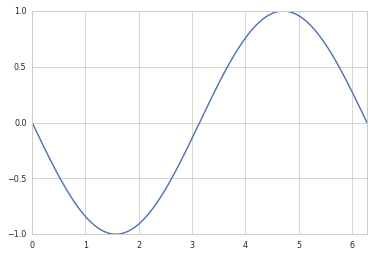

In [35]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
% matplotlib inline
plt.plot([i for i in np.linspace(0.0,2*np.pi,200)],[np.sin(i+np.pi) for i in np.linspace(0.0, 2*np.pi, 200)])
plt.xlim(0,np.pi*2)
plt.show()

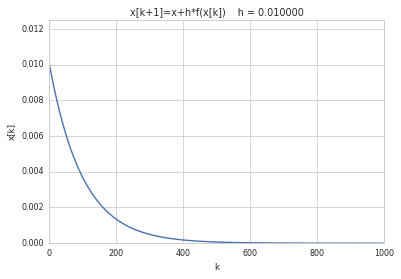

In [181]:
def f(x, noise=0.00, rand=False):
    if rand: 
        noise = np.random.random(noise, noise*10)
    return np.sin(x+np.pi) + noise

# def discr_x(x, h=0.01):
#     return x + h*f(x)

def discrete_test(offset=0.01, h=0.0, n=1000, verbose=False, mode='plot'):
    root = 2*np.pi
    offset = 0.01

    x = root + offset
    # h = 0.01
    y = [x-root]

    # n = 1000
    for i in xrange(1,n):
        x = x + h*f(x)
        y.append(x-root)

    if mode[0]=='p':
        plt.plot([i for i in range(n)],y)
    else:
        plt.scatter([i for i in range(n)],y)
    plt.xlabel('k')
    plt.ylabel('x[k]')
    plt.ylim(min(y)+min(y)/4,max(y)+max(y)/4)
    plt.title('x[k+1]=x+h*f(x[k])    h = %f' % h)
    plt.show()
    
    if verbose:
        print(y)

discrete_test(h=0.01)

Okay cool. Now I can play with $h$.

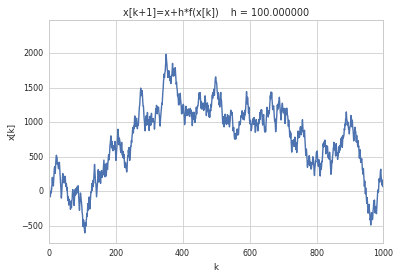

In [182]:
# utter chaos looks like the stock market
discrete_test(h=100)

>Here we see a sharp drop to our next stable fixed point. I could make this function more interesting by doing some superposition trickery st. it only has that negative slope at x = 0... but I got stuff to do.

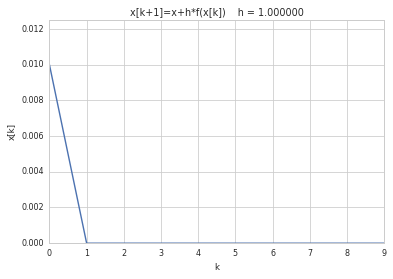

In [183]:
discrete_test(h=1,n=10)

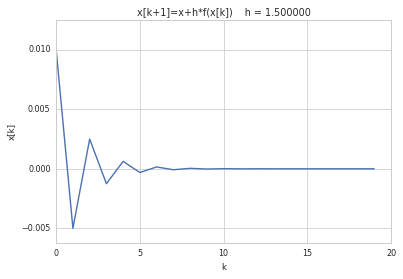

[0.009999999999999787, -0.0049997500012493035, 0.0024998437553529484, -0.0012499179721583431, 0.0006249584978945677, -0.00031247918792409735, 0.0001562395863343724, -7.8119792214614847e-05, 3.9059895986959248e-05, -1.9529947977048323e-05, 9.7649739876359831e-06, -4.8824869942620808e-06, 2.4412434980192188e-06, -1.2206217494536986e-06, 6.1031087561502773e-07, -3.0515543691933544e-07, 1.5257771934784614e-07, -7.6288858785744651e-08, 3.8144431613318375e-08, -1.9072214918480768e-08]


In [184]:
discrete_test(h=1.5, n=20, verbose=True, mode='p')

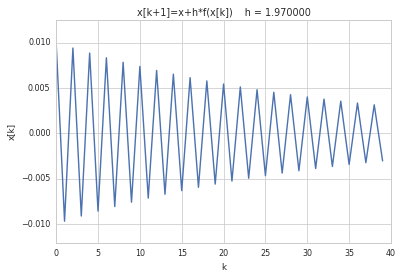

In [185]:
discrete_test(h=1.97, n=40, verbose=False, mode='p')

So we can see we're starting to approach a critical point. Once we breach it we'll skip over the next unstable FP and land at the next stable FP after that. Probably at $f(x) = 2π$. Of course, with an $h$ large enough to bounce us out of our initial stable zone, it'll also bounce us out of the next one, leading to the chaotic behavior seen above.

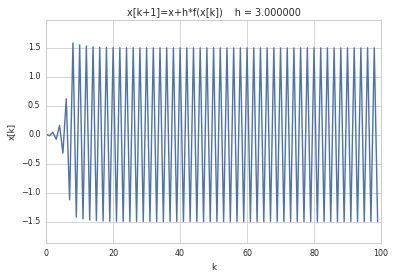

In [193]:
discrete_test(h=3.00, n=100, verbose=False, mode='p')

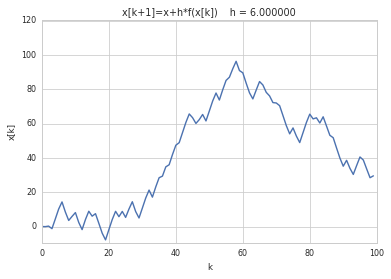

In [194]:
discrete_test(h=6.00, n=100, verbose=False, mode='p')

>~~Having a hard time finding a working example.. I know the principle though: $h$ is large enough, or the region of stability around $x^*$ is small enough that $x$ is eventually perturbed out of its stable zone and goes off somewhere else.~~

>~~ie: timesteps accumulate noise: the bigger the timestep the more dramatic this is. It's not working here because I'm multiplying a continuous function (which equals zero) by a scalar and hoping for something that's not zero..~~

>~~Wait, but if I take the~~

> $x^* = 0$, $\ f(x) = sin(x + 2π)$ $\ h = 6$

**3.2**

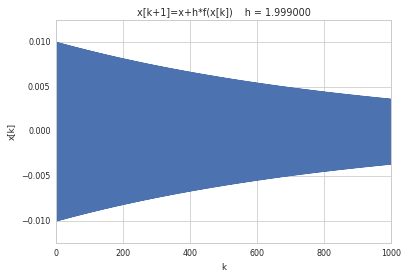

In [198]:
discrete_test(h=1.999)

> Upper bound $h^* = 2$. $\ \forall \ |h| < h^*$ : stable discrete system

> Wait how do I write ito $G$, where $\ G = \lvert \tfrac{δf}{δx}(x^*)\rvert \ > 0$

> h = G - 2? Because h = 2, and G is df/dx which is zero.. ehh?

## 4. Feedback Linearization
---

**4.1**

> Well, no: that's only true if the system can be linearized right? If it can't then you can't put it into xdot = Ax + Bu form. If you can, then sure.

**4.2**

1. > I'm not exactly sure yet when feedback linearization can be used, but I'm guessing you can if B is full row rank. Yes. Eh, how do I explain this? With an equation? What equation?

2. > Yes.

3. > Yes. We can rearrange the manipulator equation into control affine form and achieve any desired acceleration iff B is full row rank: $$M(q)\ddot{q} + C(q,\dot{q}) = T_g(q) + Bu$$
$$\longrightarrow$$
$$\ddot{q} = M^{-1}(q)\big[T_g(q) + Bu - C(q,\dot{q})\dot{q}\big]$$

[LateX ref](https://www.sharelatex.com/learn/Brackets_and_Parentheses)

**4.3**

<img src="images/asn1b_4.jpg">

## 5. Lab Assignment: Install Drake
---

**5.1**

1. > At |u| < 30: we have a normal damped pendulum that swings to rest when u = 0. When u = 25 the pendulum holds itself at an angle below horizontal against gravity. At u = -25 the pendulum swings itself at a seemingly constant speed clockwise. At u = ±30 the pendulum overcomes gravity and begins spinning at a constant speed counter-clockwise if +u, clockwise if -u. At |u| > 30 basically the same thing happens.. I'm not sure 30 was the equilibrium point. I get the point, but I'm not willing to find it through a bunch of tests, since it takes more than a few seconds to run the simulation on my machine.

2. > ~~~~

**5.2**

> I don't know, but you should check out the spinning death machine I just conjured. I slides back and forth, and the pendulum keeps spinning faster and faster counterclockwise (u=40).

## 6. Survey
---

**6.1**
> Hah. Maybe 6-8 hours over two days.

**6.2**
> Fine I guess, dunno yet. Maybe a bit slow.

**6.3**
> Rocket landings & aircraft in the sub/super/maybe-hyper sonic speed range.

**6.4**
> I *really* look forward to being able to implement Fast.ai & PyTorch code with PyDrake. I really think this'll empower a hell of a lot of stuff in robotics. And it just feels like it should've happened by now. Day's alright